# Illustration of the JL Lemma

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import math

In [2]:
A = np.random.normal(0, 1, size=(3, 2, 4))
v = np.random.normal(0, 1, size=(3))
A, v

(array([[[ 0.34929281, -0.38086757,  1.20134621,  0.12145122],
         [-0.48262177, -0.54590584,  1.47138467, -0.7637963 ]],
 
        [[-0.56128227,  0.08486563,  0.22188451,  1.51904   ],
         [ 0.36068307,  1.79263953,  0.64666422, -0.52555124]],
 
        [[ 1.61038707,  1.83686283,  0.81468408,  0.36792059],
         [ 0.6220442 ,  1.78328322,  0.45569503,  1.73952172]]]),
 array([-1.18565072, -1.24820099, -1.14594596]))

#### Let n=3, let us simulate 3 clusters of 10 point each distributed according to some Gaussians

In [3]:
mean_1 = [5, 0, 0]
cov_1 = [[1/10, 0, 0], [0, 1/10, 0], [0, 0, 1/10]] 

mean_2 = [0, 5, 0]
cov_2 = [[1/2, 0, 0], [0, 1/2, 0], [0, 0, 1/2]] 

mean_3 = [0, 0, 15]
cov_3 = [[1, 0, 0], [0, 1, 0], [0, 0, 1]] 

In [4]:
cluster_3d_1 = np.random.multivariate_normal(mean_1, cov_1, 100)
x_3d_1 = cluster_3d_1[:,0]
y_3d_1 = cluster_3d_1[:,1]
z_3d_1 = cluster_3d_1[:,2]

In [5]:
cluster_3d_2 = np.random.multivariate_normal(mean_2, cov_2, 100)
x_3d_2 = cluster_3d_2[:,0]
y_3d_2 = cluster_3d_2[:,1]
z_3d_2 = cluster_3d_2[:,2]

In [6]:
cluster_3d_3 = np.random.multivariate_normal(mean_3, cov_3, 100)
x_3d_3 = cluster_3d_3[:,0]
y_3d_3 = cluster_3d_3[:,1]
z_3d_3 = cluster_3d_3[:,2]

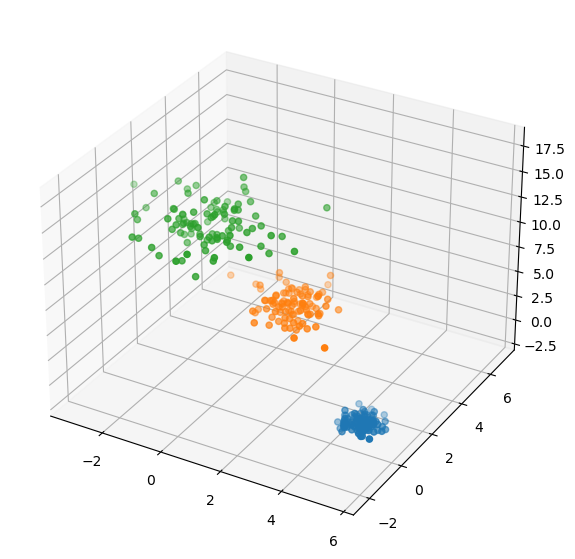

In [7]:
fig = plt.figure(figsize=(7,7))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs = x_3d_1, ys = y_3d_1, zs = z_3d_1) # plot the point (2,3,4) on the figure
ax.scatter(xs = x_3d_2, ys = y_3d_2, zs = z_3d_2)
ax.scatter(xs = x_3d_3, ys = y_3d_3, zs = z_3d_3)

plt.show()

### Choose $\epsilon = 0.1, k=2$

In [8]:
k = 2

In [9]:
A_transform = 1 / (math.sqrt(k)) * np.random.normal(0, 1, size=(2, 3))

In [10]:
A_transform

array([[-1.23212821, -0.55247846, -0.24537718],
       [-0.08871977,  0.45076854,  0.0387193 ]])

In [11]:
cluster_2d_1 = (A_transform @ cluster_3d_1.T)
cluster_2d_2 = (A_transform @ cluster_3d_2.T)
cluster_2d_3 = (A_transform @ cluster_3d_3.T)

In [12]:
(A_transform @ cluster_3d_1.T)[0,:]

array([-5.66890148, -5.68545714, -6.52853639, -6.21464425, -6.32393974,
       -5.1458614 , -5.83981814, -6.81145898, -6.13522861, -5.40169055,
       -5.61548807, -6.60813339, -5.73310138, -5.85249056, -5.9377521 ,
       -5.9580312 , -6.78805278, -6.64546169, -6.65312185, -5.80556756,
       -6.46445709, -5.90470988, -6.16840508, -6.66231906, -6.5560293 ,
       -6.88817735, -6.4060077 , -6.40395889, -6.10185896, -6.62963209,
       -6.00827206, -6.44324551, -6.38961076, -6.6556975 , -6.29107243,
       -6.30611772, -5.52278548, -5.5426588 , -6.32412537, -6.16053376,
       -6.18542063, -5.56145699, -6.09889794, -6.42251097, -6.20500723,
       -6.69922564, -5.48196627, -5.46495472, -6.62345547, -6.53792995,
       -6.35807339, -6.13233135, -6.39453155, -6.28041355, -5.9494197 ,
       -5.42968635, -6.25275163, -5.44866229, -6.18435952, -6.36282555,
       -5.66881598, -6.40413214, -6.11293457, -6.05726907, -6.22056079,
       -7.00617831, -5.94133601, -5.08153168, -5.45634901, -6.53

In [13]:
x_2d_1 = cluster_2d_1[0,:]
y_2d_1 = cluster_2d_1[1,:]
x_2d_2 = cluster_2d_2[0,:]
y_2d_2 = cluster_2d_2[1,:]
x_2d_3 = cluster_2d_3[0,:]
y_2d_3 = cluster_2d_3[1,:]

x_2d_1

array([-5.66890148, -5.68545714, -6.52853639, -6.21464425, -6.32393974,
       -5.1458614 , -5.83981814, -6.81145898, -6.13522861, -5.40169055,
       -5.61548807, -6.60813339, -5.73310138, -5.85249056, -5.9377521 ,
       -5.9580312 , -6.78805278, -6.64546169, -6.65312185, -5.80556756,
       -6.46445709, -5.90470988, -6.16840508, -6.66231906, -6.5560293 ,
       -6.88817735, -6.4060077 , -6.40395889, -6.10185896, -6.62963209,
       -6.00827206, -6.44324551, -6.38961076, -6.6556975 , -6.29107243,
       -6.30611772, -5.52278548, -5.5426588 , -6.32412537, -6.16053376,
       -6.18542063, -5.56145699, -6.09889794, -6.42251097, -6.20500723,
       -6.69922564, -5.48196627, -5.46495472, -6.62345547, -6.53792995,
       -6.35807339, -6.13233135, -6.39453155, -6.28041355, -5.9494197 ,
       -5.42968635, -6.25275163, -5.44866229, -6.18435952, -6.36282555,
       -5.66881598, -6.40413214, -6.11293457, -6.05726907, -6.22056079,
       -7.00617831, -5.94133601, -5.08153168, -5.45634901, -6.53

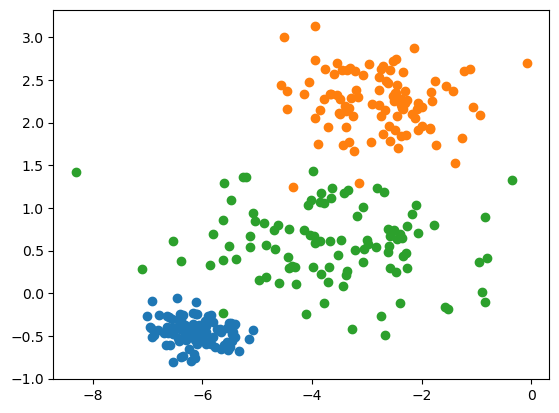

In [14]:
plt.scatter(x_2d_1, y_2d_1)
plt.scatter(x_2d_2, y_2d_2)
plt.scatter(x_2d_3, y_2d_3)

plt.show()